<a href="https://colab.research.google.com/github/akinmegs/Mobile-Phone-Market-Analysis/blob/main/prcp_1009_cellphoneprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **BUSINESS CASE:** Mobile Phone Market Analysis

# **Objective:**
The objective of this business case is to perform  a comprehensive analysis of the mobile phone market using Machine Learning Algorithms on the provided dataset. This analysis will help inform business decisions for manufacturers, retailers, and marketers in the mobile phone industry on how  important phone features (eg:- RAM, Internal Memory etc) determines its selling price.


# **Problem Statement:**

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.


## **DATA LINK:**
Link: https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1009-CellphonePrice.zip

## **Dataset Description:**
The dataset consists of 21 columns, including features such as battery power, color, clock speed, dual SIM capability, front camera quality (fc), 4G support, internal memory, mobile weight, number of CPU cores, screen height (px_height), screen width (px_width), RAM capacity (ram), screen height (sc_h), screen width (sc_w), talk time, 3G support, touch screen capability, Wi-Fi support, and price range.

## **Unzip the dataset from the data source and Load**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# List files in your Google Drive
!ls /content/drive/MyDrive/

 11655316_10204480787438947_1329512551_n.jpg   myfile.txt
'Colab Notebooks'			      'P_Order pdf.htm'
 IMG-20150912-WA0004.jpg		       RiceLeaf.zip
 IMG_20171022_192748_746.jpg


In [ ]:
# Save a file to Google Drive
file_content = "Hello, Google Drive!"
with open("/content/drive/MyDrive/myfile.txt", "w") as file:
    file.write(file_content)

In [ ]:
import requests
import zipfile
import io

# URL of the zip file
url = "https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1009-CellphonePrice.zip"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Create a file-like object from the response content
    zip_file = io.BytesIO(response.content)

    # Create a ZipFile object from the file-like object
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        # Extract all the contents to a directory (you can change the destination directory)
        zip_ref.extractall("/content/extracted_files")

    print("File has been successfully unzipped.")
else:
    print("Failed to download the file.")

File has been successfully unzipped.


In [ ]:
import shutil

# Define the directory containing the unzipped files
source_directory = '/content/extracted_files'

In [ ]:
# Define the name of the zip file to create
output_zip_file = '/content/unzipped_files.zip'

In [ ]:
# Create a zip file from the contents of the source directory
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', source_directory)

'/content/unzipped_files.zip'

In [ ]:
pwd

'/content'

In [ ]:

# Move the created zip file to a downloadable location within Colab
shutil.move(output_zip_file, '/content/unzipped_files.zip')

'/content/unzipped_files.zip'

# **#Load important libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path = '/content/extracted_files/datasets_11167_15520_train.csv'

In [ ]:
files_in_directory = os.listdir('/content/extracted_files/')
print(files_in_directory)

['Data']


In [ ]:
# Specify the subdirectory and file name
subdirectory = 'Data'
file_name = 'datasets_11167_15520_train.csv'

In [ ]:
# Create the full file path by joining the directory and file name
file_path = os.path.join('/content/extracted_files', subdirectory, file_name)

In [ ]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

## **Domain Analysis**

1.	battery_power: The battery capacity of the mobile phone in mAh (milliampere-hour).
2.	blue: Indicates whether the mobile phone has Bluetooth capability (0 for No, 1 for Yes).
3.	clock_speed: The clock speed of the processor in GHz (gigahertz).
4.	dual_sim: Indicates whether the mobile phone supports dual SIM cards (0 for No, 1 for Yes).
5.	fc: The front camera's megapixels.
6.	four_g: Indicates whether the mobile phone supports 4G network connectivity (0 for No, 1 for Yes).
7.	int_memory: The internal memory (RAM) of the mobile phone in gigabytes.
8.	m_dep: Mobile depth in cm (centimeters).
9.	mobile_wt: Weight of the mobile phone in grams.
10.	n_cores: Number of processor cores.
11.	px_height: Pixel height of the mobile phone's display.
12.	px_width: Pixel width of the mobile phone's display.
13.	ram: RAM capacity of the mobile phone in megabytes.
14.	sc_h: Screen height in cm (centimeters).
15.	sc_w: Screen width in cm (centimeters).
16.	talk_time: Talk time in hours.
17.	three_g: Indicates whether the mobile phone supports 3G network connectivity (0 for No, 1 for Yes).
18.	touch_screen: Indicates whether the mobile phone has a touch screen (0 for No, 1 for Yes).
19.	wifi: Indicates whether the mobile phone supports Wi-Fi connectivity (0 for No, 1 for Yes).
20.	price_range: The price range category of the mobile phone, likely categorized into different price brackets (e.g., 0 for low, 1 for mid, 2 for high).

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#Descriptive Statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Based on the above summary statistics for the dataset, here are some insights and observations:

**Battery Power (battery_power):**
The mean battery power is approximately 1238.52 mAh, with a wide range from 501 to 1998 mAh.
The distribution appears to be relatively evenly spread, with no extreme outliers.

**Bluetooth (blue):**
About half of the devices (approximately 49.5%) have Bluetooth functionality.
This is a binary categorical variable with values 0 and 1.

**Clock Speed (clock_speed):**
The average clock speed is around 1.52 GHz, ranging from 0.5 GHz to 3.0 GHz.
The distribution seems relatively normal, with
no extreme outliers.

**Dual SIM (dual_sim):**
Approximately half of the devices (approximately 50.95%) support dual SIM cards.
Like Bluetooth, this is also a binary categorical variable with values 0 and 1.

**Front Camera Megapixels (fc):**
The mean front camera resolution is approximately 4.31 megapixels, with values ranging from 0 to 19 megapixels.
There is a wide range of front camera resolutions among the devices.

**4G Connectivity (four_g):**
Slightly more than half of the devices (approximately 52.15%) support 4G connectivity.
This is another binary categorical variable with values 0 and 1.

**Internal Memory (int_memory):**
The mean internal memory is around 32.05 GB, with values ranging from 2 GB to 64 GB.
There is variability in internal memory capacity among the devices.

**Mobile Depth (m_dep):**
The average mobile depth is approximately 0.50 cm, with values ranging from 0.1 cm to 1.0 cm.
The distribution appears to be relatively normal.

**Mobile Weight (mobile_wt):**
The average mobile weight is approximately 140.25 grams, with values ranging from 80 grams to 200 grams.
There is a moderate range of weights among the devices.

**Number of Cores (n_cores):**
The mean number of processor cores is approximately 4.52, with values ranging from 1 to 8.
The distribution of core counts is relatively even.

**Primary Camera Megapixels (pc):**
The mean primary camera resolution is approximately 9.92 megapixels, with values ranging from 0 to 20 megapixels.
The distribution of primary camera resolutions varies.

**Pixel Height (px_height) and Pixel Width (px_width):**
The mean pixel height is approximately 645.11 pixels, and the mean pixel width is approximately 1251.52 pixels.
Both pixel height and width have a wide range of values, with some devices having high-resolution displays.

**RAM (ram):**
The average RAM size is approximately 2124.21 MB, with values ranging from 256 MB to 3998 MB.
RAM size is an important feature for mobile devices and varies significantly among the devices.

**Screen Height (sc_h) and Screen Width (sc_w):**
The mean screen height is approximately 12.31 cm, and the mean screen width is approximately 5.77 cm.
These dimensions are related to the physical size of the screens on the devices.

**Talk Time (talk_time):**
The average talk time is approximately 11.01 hours, with values ranging from 2 to 20 hours.
This represents the expected battery life during talk time.

**3G Connectivity (three_g):**
Approximately 76.15% of the devices support 3G connectivity.
This is another binary categorical variable with values 0 and 1.

**Touch Screen (touch_screen):**
Approximately 50.3% of the devices have a touch screen.
This is a binary categorical variable.

**Wi-Fi (wifi):**
Approximately 50.7% of the devices support Wi-Fi.
This is another binary categorical variable.

**Price Range (price_range):**
The target variable is divided into four categories (0, 1, 2, and 3), representing different price ranges.
The mean price range is approximately 1.5, and the values range from 0 to 3.

# **Market Segmentation:**
 The analysis below Segment the mobile phone market based on various criteria such as price range, battery power, RAM capacity, camera quality, and more. This segmentation can help identify target customer groups for different types of phones.

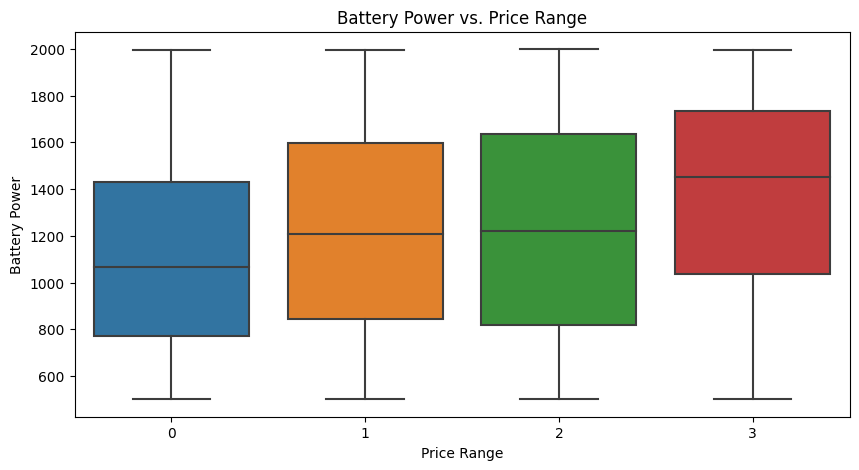

In [ ]:
# Market Segmentation based on Price Range
plt.figure(figsize=(10, 5))
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title('Battery Power vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

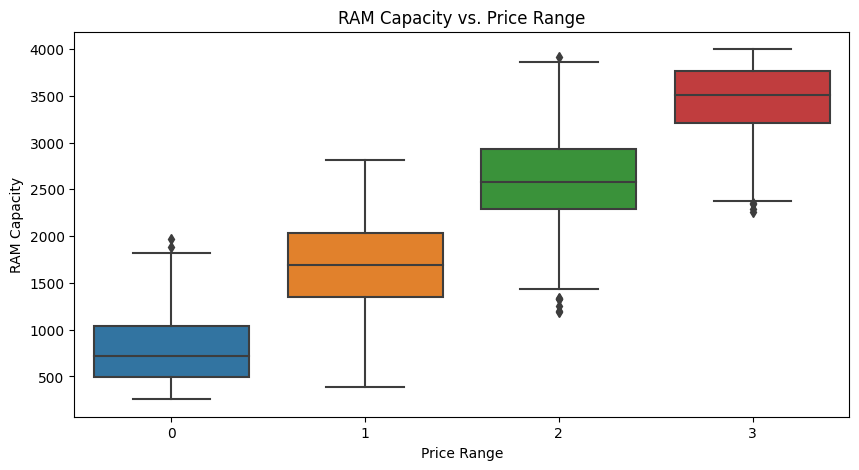

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='price_range', y='ram', data=df)
plt.title('RAM Capacity vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM Capacity')
plt.show()

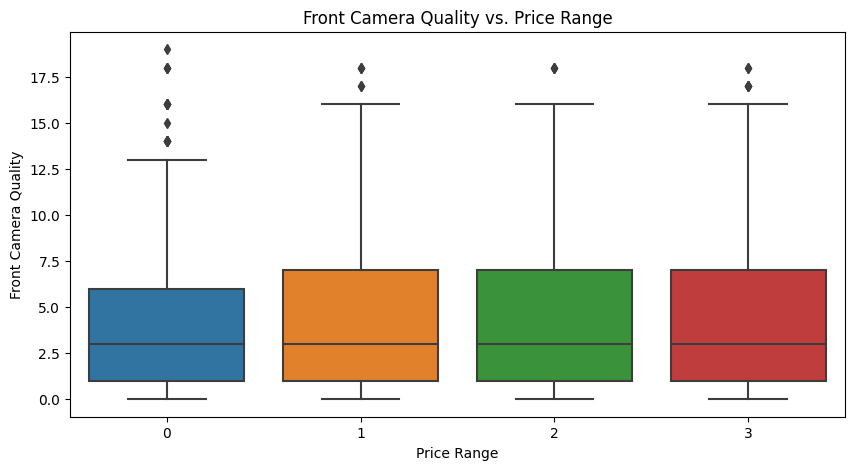

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='price_range', y='fc', data=df)
plt.title('Front Camera Quality vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Front Camera Quality')
plt.show()

## 	Data Visualization:

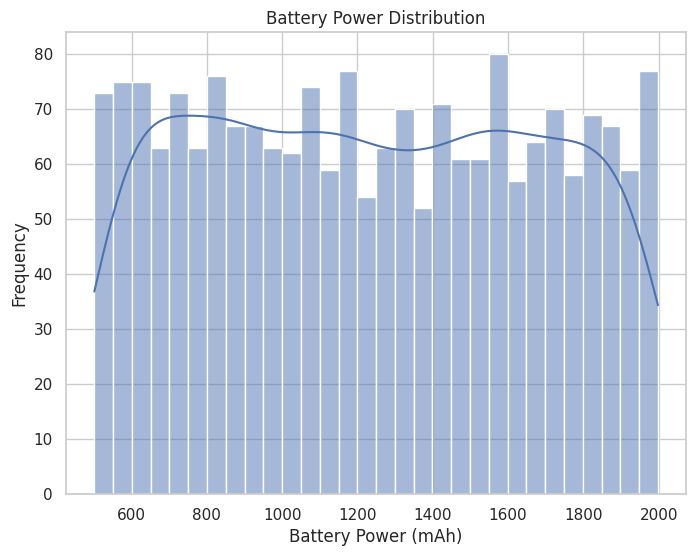

In [ ]:
# Set style for Seaborn plots (optional)
sns.set(style="whitegrid")

# Create a histogram for battery_power
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="battery_power", bins=30, kde=True)
plt.title("Battery Power Distribution")
plt.xlabel("Battery Power (mAh)")
plt.ylabel("Frequency")
plt.show()

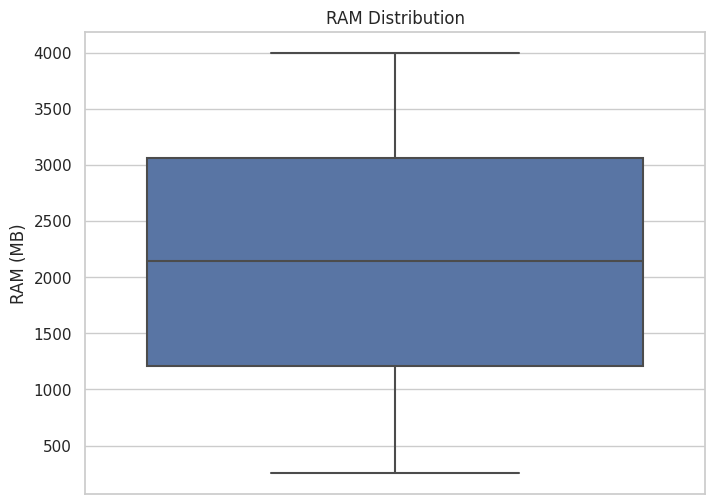

In [ ]:
# Create a box plot for RAM (ram)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="ram")
plt.title("RAM Distribution")
plt.ylabel("RAM (MB)")
plt.show()

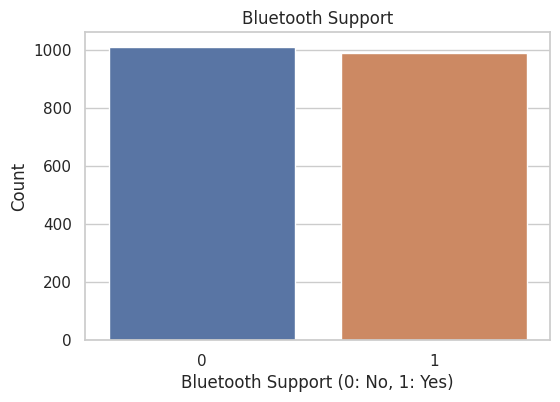

In [ ]:
# Create a bar chart for Bluetooth (blue)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="blue")
plt.title("Bluetooth Support")
plt.xlabel("Bluetooth Support (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

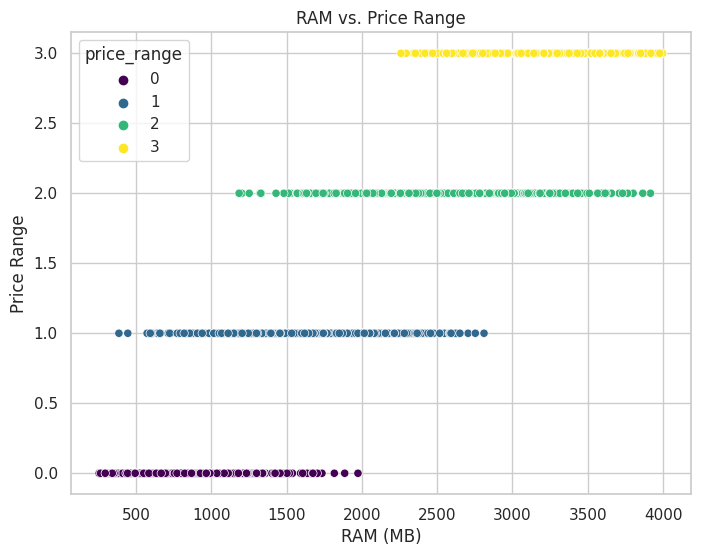

In [ ]:
# Create a scatter plot for RAM vs. Price Range (ram vs. price_range)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="ram", y="price_range", hue="price_range", palette="viridis")
plt.title("RAM vs. Price Range")
plt.xlabel("RAM (MB)")
plt.ylabel("Price Range")
plt.show()

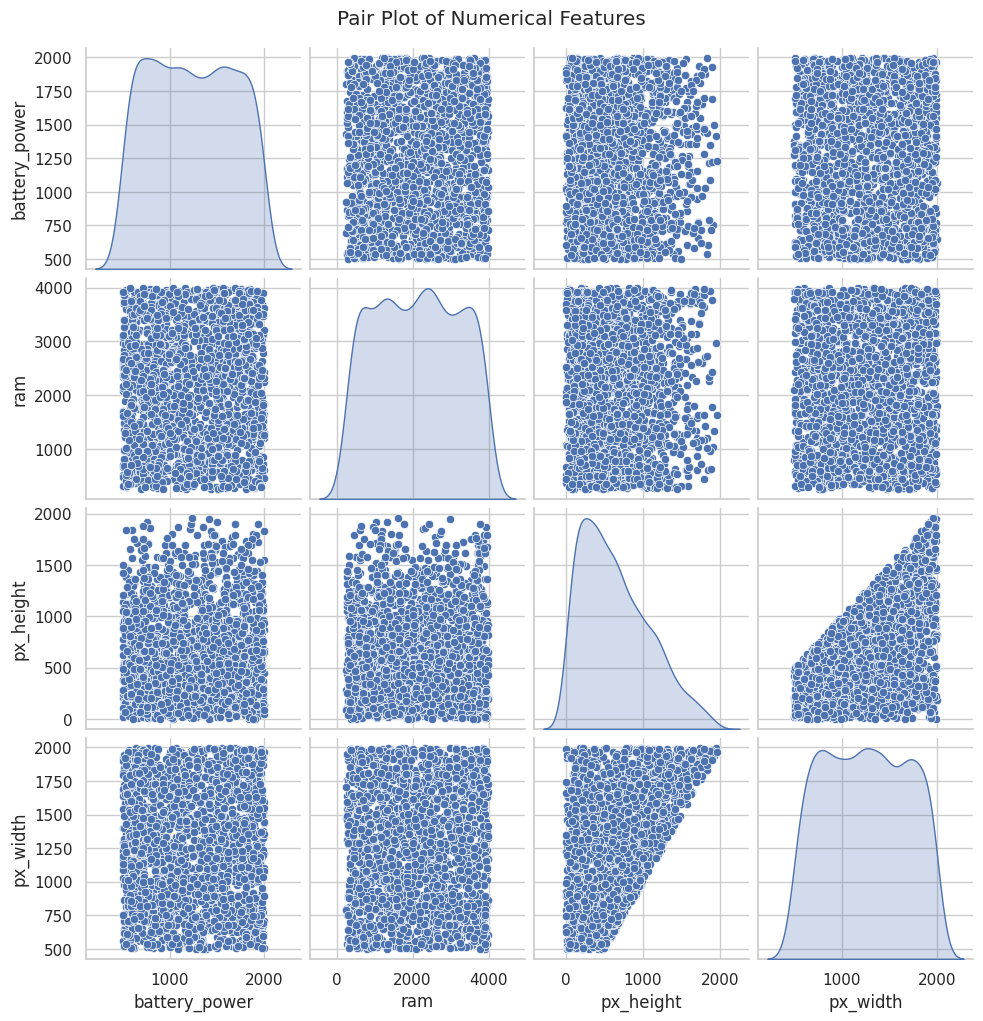

In [ ]:
# Create a pair plot (scatter matrix) for selected numerical features
selected_features = ["battery_power", "ram", "px_height", "px_width"]
sns.pairplot(data=df[selected_features], diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

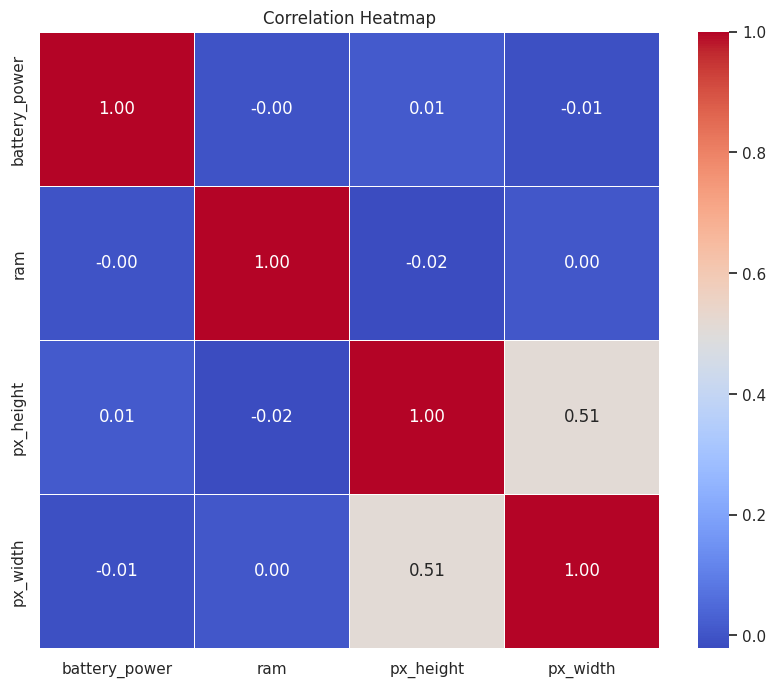

In [ ]:
# Create a correlation heatmap for selected numerical features
plt.figure(figsize=(10, 8))
selected_corr = df[selected_features].corr()
sns.heatmap(selected_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

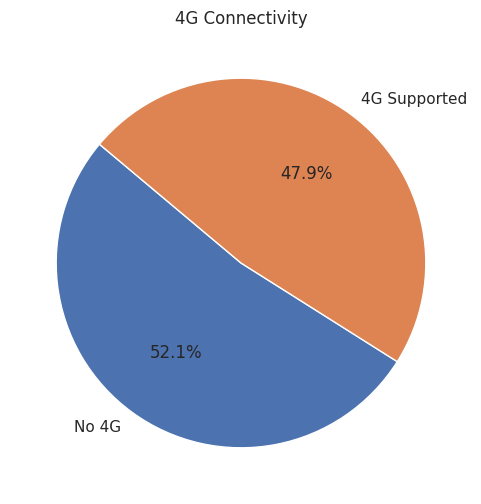

In [ ]:
# Create a pie chart for the distribution of 'four_g' values
plt.figure(figsize=(6, 6))
four_g_counts = df["four_g"].value_counts()
plt.pie(four_g_counts, labels=["No 4G", "4G Supported"], autopct="%1.1f%%", startangle=140)
plt.title("4G Connectivity")
plt.show()

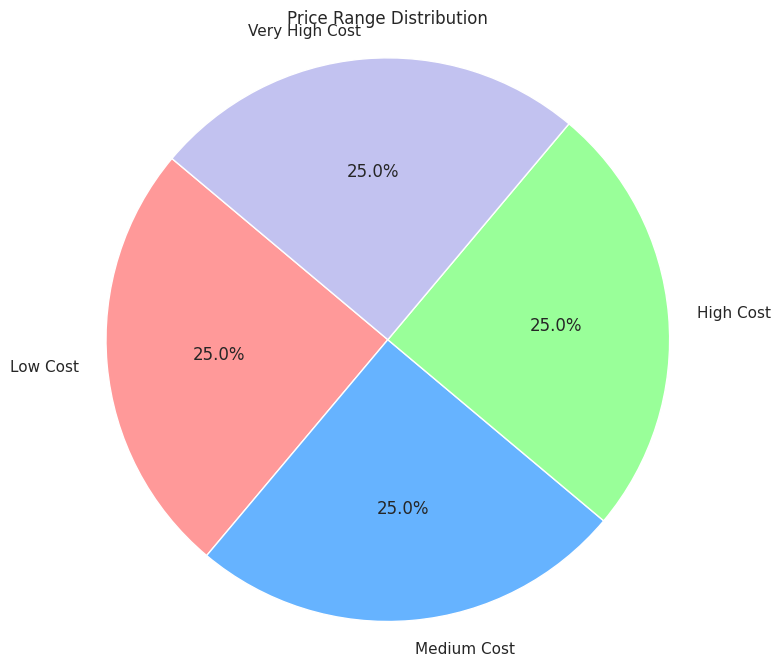

In [ ]:
# Count the occurrences of each price range category
price_range_counts = df['price_range'].value_counts()

# Define labels for the pie chart
labels = ['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost']

# Define colors for the pie chart wedges
colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0']

# Create a pie chart for the price range distribution
plt.figure(figsize=(8, 8))
plt.pie(price_range_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Price Range Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

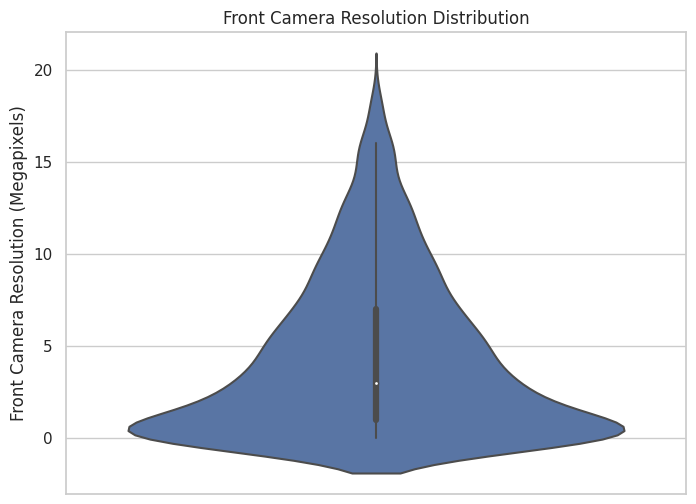

In [ ]:
# Create a violin plot for Front Camera (fc)
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, y="fc")
plt.title("Front Camera Resolution Distribution")
plt.ylabel("Front Camera Resolution (Megapixels)")
plt.show()

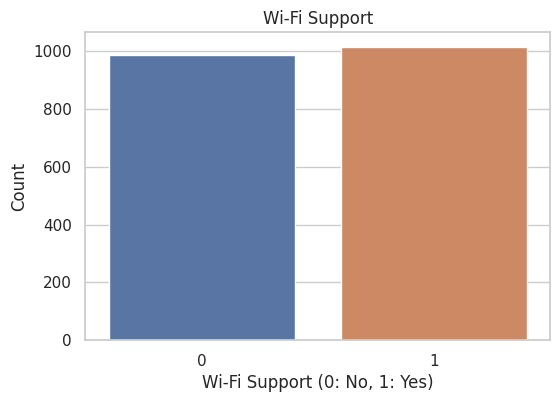

In [ ]:
# Create a count plot for Wi-Fi support (wifi)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="wifi")
plt.title("Wi-Fi Support")
plt.xlabel("Wi-Fi Support (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

# **EDA:** Understanding how various features relates to the target variable. That is, to explore the relationships between various features (Independent Variables)  in the dataset and the price_range (target variable).

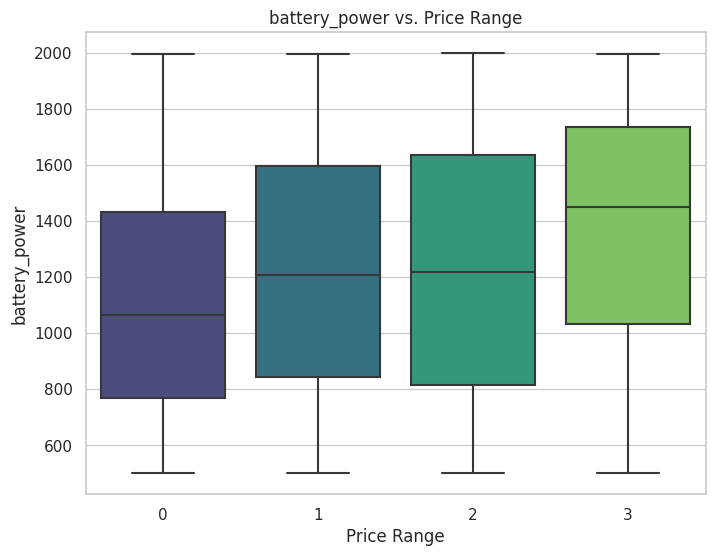

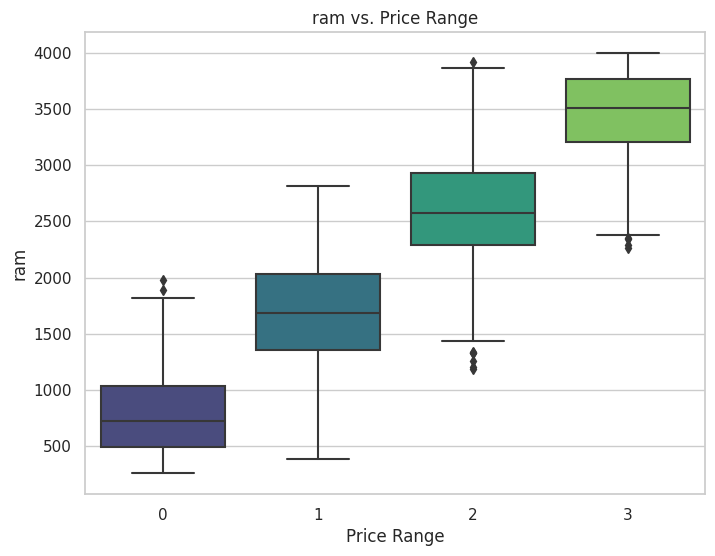

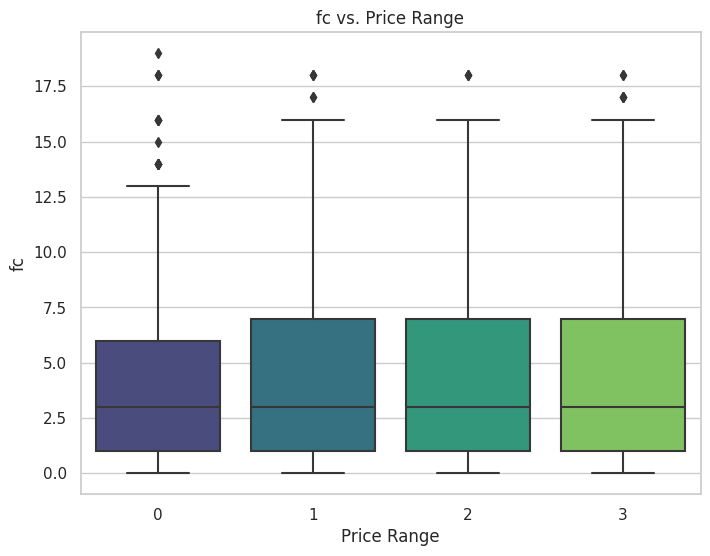

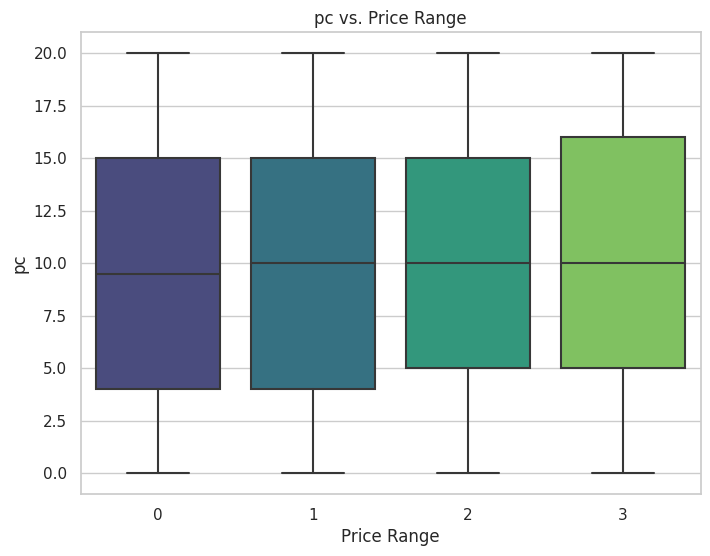

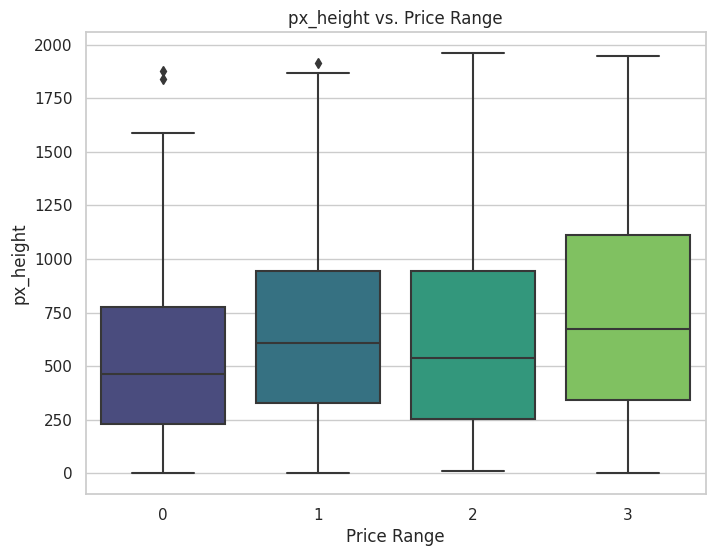

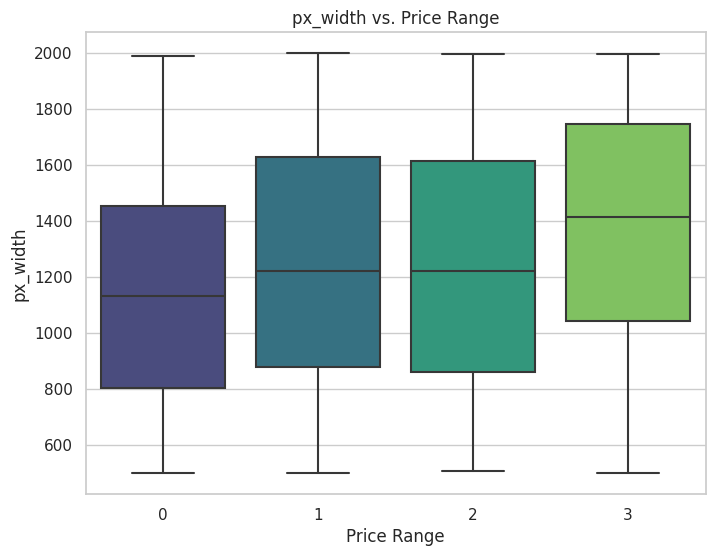

In [ ]:
# Explore relationships with numerical features
numerical_features = ['battery_power', 'ram', 'fc', 'pc', 'px_height', 'px_width']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='price_range', y=feature, data=df, palette='viridis')
    plt.title(f'{feature} vs. Price Range')
    plt.xlabel('Price Range')
    plt.ylabel(feature)
    plt.show()

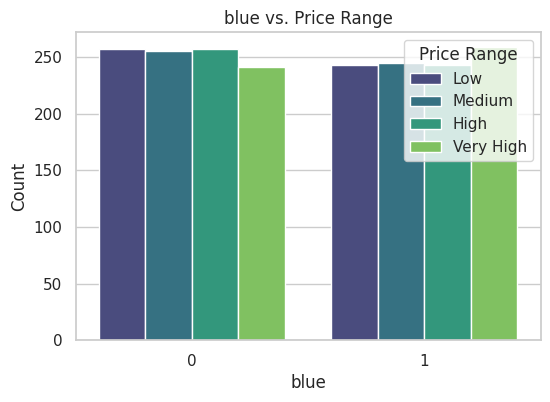

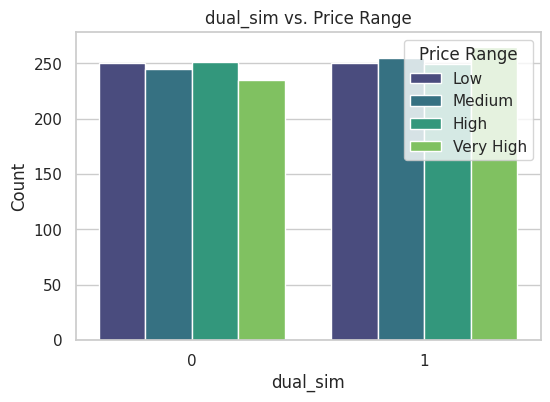

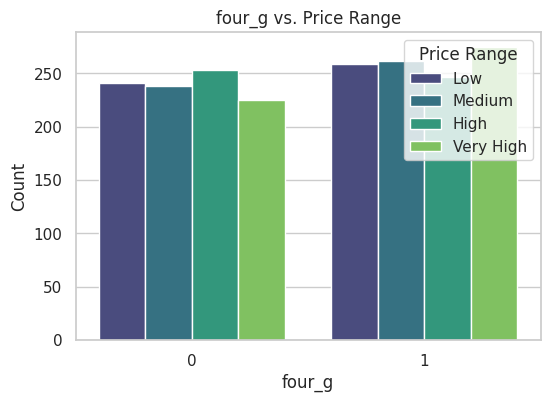

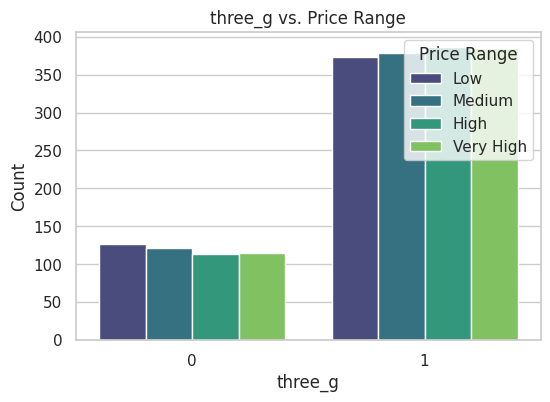

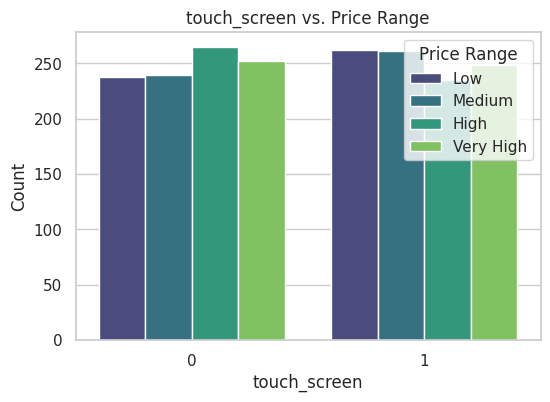

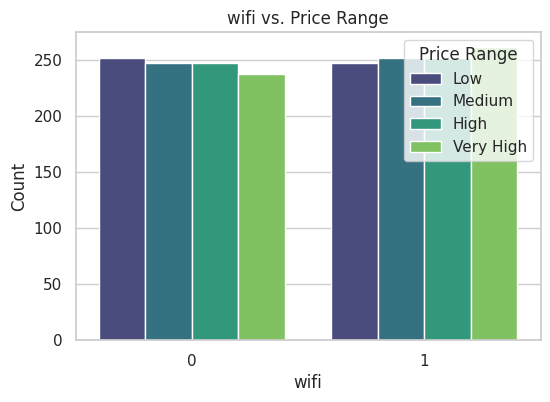

In [ ]:
# Explore relationships with categorical features
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='price_range', data=df, palette='viridis')
    plt.title(f'{feature} vs. Price Range')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Price Range', loc='upper right', labels=['Low', 'Medium', 'High', 'Very High'])
    plt.show()

# **Feature Selection/Engineering:**

In [ ]:
#Feature Selection:

##Correlation Analysis:
###Compute the correlation between each feature and the target variable (price_range).
##Features with a higher absolute correlation value are generally more important.

correlation_matrix = df.corr()
price_range_correlations = correlation_matrix['price_range'].abs().sort_values(ascending=False)

# Print the price_range_correlations values
print(price_range_correlations)





price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64


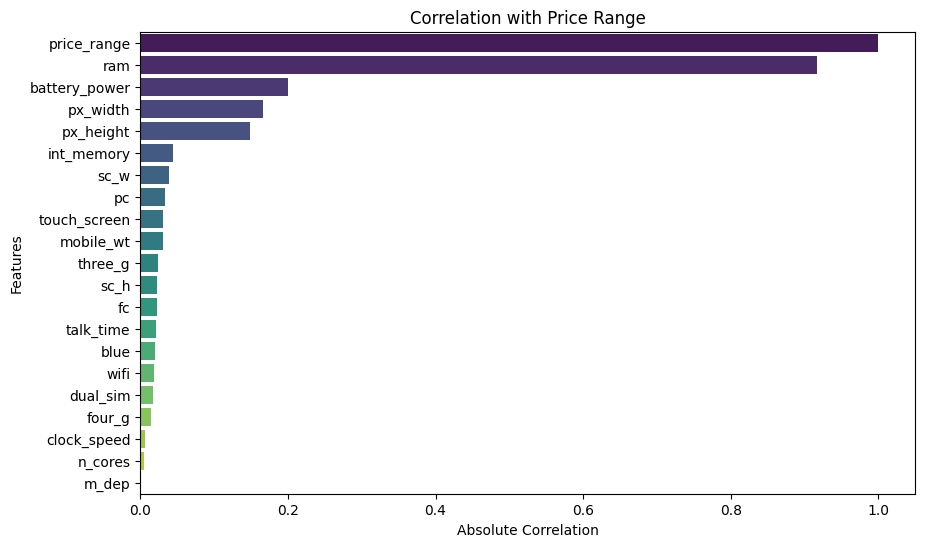

In [ ]:
# Create a bar chart for price_range_correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_correlations.values, y=price_range_correlations.index, palette='viridis')
plt.title("Correlation with Price Range")
plt.xlabel("Absolute Correlation")
plt.ylabel("Features")
plt.show()


# ***In summary, RAM, battery power, pixel resolution (width and height), and to a lesser extent, internal memory, are the features that show relatively stronger correlations with the price_range. These insights can be valuable when considering which features are most relevant for predicting the price range of mobile devices.***



In [ ]:
###Feature Engineering:

df['screen_size'] = df['sc_h'] * df['sc_w']
df['total_camera_resolution'] = df['fc'] + df['pc']

# **Binning or Bucketing:**

 Convert continuous features into categorical features by creating bins or buckets. In this case we will convert battery_power into a categorical feature representing low, medium, and high battery capacities.

In [ ]:
df['battery_power_category'] = pd.cut(df['battery_power'], bins=3, labels=['Low', 'Medium', 'High'])

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_size,total_camera_resolution,battery_power_category
0,842,0,2.2,0,1,0,7,0.6,188,2,...,9,7,19,0,0,1,1,63,3,Low
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,17,3,7,1,1,0,2,51,6,Medium
2,563,1,0.5,1,2,1,41,0.9,145,5,...,11,2,9,1,1,0,2,22,8,Low
3,615,1,2.5,0,0,0,10,0.8,131,6,...,16,8,11,1,0,0,2,128,9,Low
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,8,2,15,1,1,0,1,16,27,High


# **Encoding Categorical Features:**

In [ ]:
df_encoded = pd.get_dummies(df, columns=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], drop_first=True)

In [ ]:
df_encoded.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,price_range,screen_size,total_camera_resolution,battery_power_category,blue_1,dual_sim_1,four_g_1,three_g_1,touch_screen_1,wifi_1
0,842,2.2,1,7,0.6,188,2,2,20,756,...,1,63,3,Low,0,0,0,0,0,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,2,51,6,Medium,1,1,1,1,1,0
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,2,22,8,Low,1,1,1,1,1,0
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,2,128,9,Low,1,0,0,1,0,0
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,1,16,27,High,1,0,1,1,1,0


# **Feature Scaling:**

```

```



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['battery_power', 'ram', 'px_height', 'px_width']])


## **MODEL BUILDING AND SELCTION **

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Split your data into training and testing sets
X = df_encoded.drop(columns=['price_range'])  # Features
y = df_encoded['price_range']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Define categorical columns
categorical_cols = ['battery_power_category']

# Create a transformer for encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Create a ColumnTransformer to apply encoding to the 'battery_power_category' column
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Loop through each algorithm and evaluate its performance
results = []

In [ ]:
# Define a list of classification algorithms
algorithms = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB())
]

results = []


In [ ]:
for name, model in algorithms:
    # Create a pipeline that includes preprocessing and the model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])

    clf.fit(X_train, y_train)  # Train the model
    y_pred = clf.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results.append({
        'Algorithm': name,
        'Accuracy': accuracy,
        'Classification Report': report
    })

In [ ]:
# Compare the results
for result in results:
    print(f"Algorithm: {result['Algorithm']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print("Classification Report:\n", result['Classification Report'])
    print("="*40)

Algorithm: Logistic Regression
Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       105
           1       0.54      0.53      0.53        91
           2       0.51      0.54      0.53        92
           3       0.69      0.71      0.70       112

    accuracy                           0.64       400
   macro avg       0.64      0.63      0.64       400
weighted avg       0.65      0.64      0.64       400

Algorithm: Decision Tree
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       105
           1       0.76      0.86      0.80        91
           2       0.81      0.73      0.77        92
           3       0.88      0.91      0.89       112

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       4

# **Model Result Interpretations and Insight**

1. Logistic Regression:
   Accuracy: 0.64
   Precision, recall, and F1-score: Varies by class but generally moderate.

   Insights: Logistic regression shows moderate performance with an accuracy of 0.64. It is better at distinguishing some classes than others. Precision, recall, and F1-scores vary across classes, indicating varying levels of correctness in predictions.

2. Decision Tree:
   Accuracy: 0.84
   Precision, recall, and F1-score: Generally good across all classes.

   Insights: The decision tree algorithm performs well with an accuracy of 0.84. It shows good precision, recall, and F1-scores for all classes, suggesting a well-balanced classification performance.

3. Random Forest:
   Accuracy: 0.90
   Precision, recall, and F1-score: Generally high across all classes.
   
  Insights: Random Forest outperforms Logistic Regression with an accuracy of 0.90. It shows high precision, recall, and F1-scores for all classes, indicating a robust and well-generalized model.

4. Support Vector Machine:
  Accuracy: 0.97
  Precision, recall, and F1-score: Very high across all classes.

  Insights: Support Vector Machine (SVM) demonstrates excellent performance with an accuracy of 0.97. It exhibits very high precision, recall, and F1-scores for all classes, making it the top-performing algorithm in this comparison.

5. K-Nearest Neighbors:
   Accuracy: 0.95
   Precision, recall, and F1-score: High across all classes.

  Insights: K-Nearest Neighbors (KNN) performs very well with an accuracy of 0.95. It shows high precision, recall, and F1-scores for all classes, indicating a strong ability to classify instances based on their nearest neighbors.

6. Naive Bayes:
   Accuracy: 0.82
   Precision, recall, and F1-score: Varies by class but generally moderate.

   Insights: Naive Bayes performs moderately with an accuracy of 0.82. Its precision, recall, and F1-scores vary across classes, indicating that it may not be as effective in distinguishing between certain classes.



## **Summary and Conclusion:**

In summary, the Support Vector Machine (SVM) algorithm appears to be the best-performing algorithm on this dataset, achieving the highest accuracy and precision. Random Forest and K-Nearest Neighbors also perform well.

Also, the correlation analysis of the independent variables and the target price_range, shows that features like battery_power, ram, pixel_width, pixel_height, internal_memory, screen_width, torch_screen are major features that determines the price_range of a mobile phone.

However, the choice of the best algorithm may also depend on other factors like computational complexity and specific requirements of the application.